In [1]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import itertools
from z3 import *

In [2]:
url='https://www.janestreet.com/puzzles/robot-long-jump-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published\n'+url))
HTML(str(soup.find_all('div', {'class' :'col-12'})[3]))

### Puzzle as published
https://www.janestreet.com/puzzles/robot-long-jump-index/

In [3]:
def game(jump):
    a=0
    while a<jump:
        a += random.random()
    if a >1:
        return 0
    else:
        a +=0.5
        return a
    
def sim(jump,trials=10000):
    total =0
    for i in range(trials):
        total +=game(jump)
    return total/trials

In [4]:
# Maximise 1 player game
x,y =symbols("x y")
f = Function("f")

#chance of 

Eq1 = Eq(f(x),exp(x)*(1-x)*(1+x/2))
Eq2 = sy.diff(Eq1.rhs).simplify()
display(Eq1)
display(Eq2)
[(i,i.evalf()) for i in sy.solve(Eq(Eq2,0))if i>0]

Eq(f(x), (1 - x)*(x/2 + 1)*exp(x))

(-x**2 - 3*x + 1)*exp(x)/2

[(-3/2 + sqrt(13)/2, 0.302775637731995)]

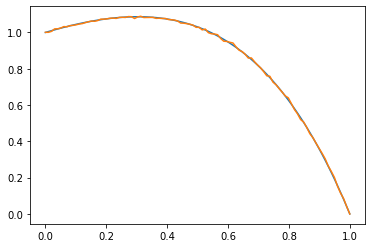

In [5]:
a = np.linspace(0.0001,1,100)
v_sim = np.vectorize(sim)
v_func = np.vectorize(lambda x:exp(x)*(1-x)*(1+x/2))

plt.plot(a,v_func(a))
plt.plot(a,v_sim(a))

In [6]:
sy.nsolve(Eq(-1/12*exp(x)*(x-1)*(-x**3+x**2+4*x+6),1/2),x,0.4)

0.632808492604494

In [7]:
# model the game based on the strategies of each player. Threshold at which they jump is x,y
p = Function("p")
f = Function("f")
g = Function("g")

x,y,u,v =sy.symbols("x y u v",positive=True)

Eq1 = Eq(f(u),(Min(1,u)-Max(x,u-1))/(1-x))
Eq2 = Eq(g(v),(Min(1,v)-Max(y,v-1))/(1-y))

Eq3 = sy.Eq(p(x,y),
            (exp(x)*(1 - x)* (1 - exp(y)*(1 - y)) +  
             sy.integrate(f(u)*g(v), (v, y, u),(u, Max(x, y), 2)) *
             exp(x)* (1 - x)*exp(y)* (1 - y)) / (1 - (1 - exp(x)* (1 - x))* (1 - exp(y)* (1 - y)))
            )

display(Eq3.subs(Eq1.lhs,Eq1.rhs).subs(Eq2.lhs,Eq2.rhs))

Eq(p(x, y), ((1 - x)*(1 - y)*exp(x)*exp(y)*Integral((-Max(x, u - 1) + Min(1, u))*Integral((-Max(y, v - 1) + Min(1, v))/(1 - y), (v, y, u))/(1 - x), (u, Max(x, y), 2)) + (1 - x)*(-(1 - y)*exp(y) + 1)*exp(x))/(-(-(1 - x)*exp(x) + 1)*(-(1 - y)*exp(y) + 1) + 1))

In [8]:
print(Eq3.subs(Eq1.lhs,Eq1.rhs).subs(Eq2.lhs,Eq2.rhs).rewrite(sy.Piecewise).doit().simplify())

Eq(p(x, y), Piecewise(((-(x - 1)*((1 - y)*exp(y) - 1)*(x*y - x - y + 1)*exp(x) + (24*x*y*(y - 1)*(x*y - x - y + 1)*(Min(2, x + 1) - Min(2, Max(x, Min(Max(1, Min(y, x + 1)), Max(Min(1, y), Min(x + 1, Max(1, y)))))) + Min(2, Max(1, x, Min(y, x + 1))) - 2) + 24*x*(x - 1)*(y - 1)*(2*y - (y + 1)*Min(2, x + 1) + 2) - 6*y*(x - 1)*(y - 1)*(24*x + 12*y - (2*x + y)*Min(2, x)**2 - 3*(2*x + y)*Min(2, x + 1)**2 + (2*x + y)*Min(2, Max(1, x))**2 - (2*x + y)*Min(2, Max(x, Min(x + 1, Max(1, y))))**2 + (2*x + y)*Min(2, Max(x, Min(Max(1, Min(y, x + 1)), Max(Min(1, y), Min(x + 1, Max(1, y))))))**2) - 12*(x - 1)*(y - 1)*(x*y - x - y + 1)*(2*y*Min(2, Max(1, x)) - 2*y*Min(2, Max(1, x, Min(y, x + 1))) + (y + 1)*Min(2, Max(1, x, Min(y, x + 1))) - (y + 1)*Min(2, Max(1, x, Min(x + 1, y + 1))) - Min(2, Max(1, x))**2 + Min(2, Max(1, x, Min(x + 1, y + 1)))**2) + 3*(x - 1)*(y - 1)*(Min(2, x)**4 + 4*Min(2, x + 1)**4 - Min(2, Max(1, x))**4 + Min(2, Max(x, Min(x + 1, Max(1, y))))**4 - Min(2, Max(x, Min(Max(1, Min(y, x 

In [9]:
# Couldn't get any further with Sympy
# but the solution using mathematica is

Eq4 = Eq(p(x,y),sy.Piecewise(
                (
                (exp(x)*(x - 1)*(exp(y)*(-x**3 + x**2 - 3*(x - 1)*y**2 + 2*(x - 1)**2*y + 4*x + 2*y**3 - 6) + 12))/
                ((12*(exp(x)*(x - 1) + exp(y)*((y - 1))*(exp(x)*(x - 1) + 1)))),
            x>=y),
                (
                (exp(x)*((exp(y)*(y - 1)*(-2*x**3 + 3*x**2*(y-1) - 2*x*((y-2)*y-5) + (y-3)*(y*(y+2)+2))) + 12*(x - 1)))/
                (12*((exp(x)*(x-1)+1)*exp(y)*(y-1)+exp(x)*(x-1))),
            x<y)
                  ))
           
display(Eq4)

Eq(p(x, y), Piecewise(((x - 1)*((-x**3 + x**2 + 4*x + 2*y**3 - y**2*(3*x - 3) + 2*y*(x - 1)**2 - 6)*exp(y) + 12)*exp(x)/(12*(x - 1)*exp(x) + 12*(y - 1)*((x - 1)*exp(x) + 1)*exp(y)), x >= y), ((12*x + (y - 1)*(-2*x**3 + 3*x**2*(y - 1) - 2*x*(y*(y - 2) - 5) + (y - 3)*(y*(y + 2) + 2))*exp(y) - 12)*exp(x)/(12*(x - 1)*exp(x) + 12*(y - 1)*((x - 1)*exp(x) + 1)*exp(y)), True)))

In [10]:
# find the turning point to get the best strategy
strategy = sy.nsolve([Eq4.rhs.diff(x), Eq4.rhs.diff(y)], [x, y],(0.5,0.5))
strategy

Matrix([
[0.416195354858236],
[0.416195354858236]])

In [11]:
# turn that into the probability of going bust
bust = lambda x: 1-((1-x)*math.exp(x))

display(Markdown(("**Solution is {:.9f}**".format(bust(strategy[0])))))

**Solution is 0.114845886**

In [12]:
url='https://www.janestreet.com/puzzles/robot-long-jump-solution//'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Solution as published \n'+url))
HTML(str(soup.find_all('div', {'class' :'col-12'})[0])+str(soup.find_all('div', {'class' :'col-12'})[3]))


### Solution as published 
https://www.janestreet.com/puzzles/robot-long-jump-solution//